In [2]:
import numpy as np
import pandas as pd

In [3]:
import quandl 

In [5]:
import datetime

In [6]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2017,1,1)
apple = quandl.get('WIKI/AAPL.11',start_date= start,end_date = end)
cisco = quandl.get('WIKI/CSCO.11',start_date= start,end_date = end)
ibm = quandl.get('WIKI/IBM.11',start_date= start,end_date = end)
amazon = quandl.get('WIKI/AMZN.11',start_date= start,end_date = end)

In [9]:
stocks = pd.concat([apple['Adj. Close'],ibm['Adj. Close'],cisco['Adj. Close'], amazon['Adj. Close']], axis =1 )

In [10]:
stocks. columns = ['Apple','IBM','Cisco','Amazon']

In [11]:
stocks.head()

,Apple,IBM,Cisco,Amazon
Date,,,,
2012-01-03,52.848787,157.578371,15.617341,179.03
2012-01-04,53.132802,156.935540,15.919125,177.51
2012-01-05,53.722681,156.191208,15.860445,177.61
2012-01-06,54.284287,154.398046,15.801764,182.61
2012-01-09,54.198183,153.594506,15.902359,178.56


In [12]:
stocks.diff()

,Apple,IBM,Cisco,Amazon
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.284016,-0.642832,0.301784,-1.52
2012-01-05,0.589879,-0.744332,-0.058680,0.10
2012-01-06,0.561606,-1.793162,-0.058680,5.00
2012-01-09,-0.086104,-0.803540,0.100595,-4.05
...,...,...,...,...
2016-12-23,0.227159,-0.336916,0.067582,-5.75
2016-12-27,0.730860,0.413925,0.144818,10.81
2016-12-28,-0.493824,-0.914486,-0.251018,0.73


In [13]:
stocks.pct_change(1)

,Apple,IBM,Cisco,Amazon
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,-0.004079,0.019324,-0.008490
2012-01-05,0.011102,-0.004743,-0.003686,0.000563
2012-01-06,0.010454,-0.011481,-0.003700,0.028152
2012-01-09,-0.001586,-0.005204,0.006366,-0.022178
...,...,...,...,...
2016-12-23,0.001978,-0.002095,0.002298,-0.007503
2016-12-27,0.006351,0.002579,0.004913,0.014213
2016-12-28,-0.004264,-0.005684,-0.008475,0.000946


In [18]:
(np.divide(stocks-stocks.shift(1), stocks.shift(1)))

,Apple,IBM,Cisco,Amazon
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,-0.004079,0.019324,-0.008490
2012-01-05,0.011102,-0.004743,-0.003686,0.000563
2012-01-06,0.010454,-0.011481,-0.003700,0.028152
2012-01-09,-0.001586,-0.005204,0.006366,-0.022178
...,...,...,...,...
2016-12-23,0.001978,-0.002095,0.002298,-0.007503
2016-12-27,0.006351,0.002579,0.004913,0.014213
2016-12-28,-0.004264,-0.005684,-0.008475,0.000946


<IPython.core.display.Javascript object>

(array([[  1.,   0.,   0.,   1.,   6.,   7.,  45., 159., 515., 377., 109.,
          24.,   8.,   3.,   1.,   1.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   1.,   1.,   5.,   3.,  12., 130., 621., 410.,  65.,
           8.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  1.,   1.,   0.,   1.,   2.,   5.,  20., 145., 584., 396.,  84.,
          12.,   1.,   1.,   0.,   3.,   0.,   1.,   0.,   0.],
        [  1.,   2.,   1.,   3.,   5.,   5.,  46., 177., 469., 349., 154.,
          27.,   7.,   2.,   2.,   4.,   0.,   0.,   2.,   1.]]),
 array([-0.12354938, -0.10949906, -0.09544874, -0.08139842, -0.0673481 ,
        -0.05329778, -0.03924746, -0.02519714, -0.01114682,  0.0029035 ,
         0.01695382,  0.03100414,  0.04505446,  0.05910477,  0.07315509,
         0.08720541,  0.10125573,  0.11530605,  0.12935637,  0.14340669,
         0.15745701]),
 <a list of 4 BarContainer objects>)

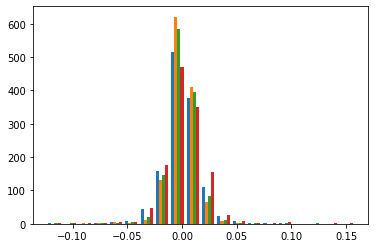

In [21]:
plt.hist((np.divide(stocks-stocks.shift(1), stocks.shift(1))), bins= 20)

array([[<AxesSubplot:title={'center':'Apple'}>,
        <AxesSubplot:title={'center':'IBM'}>],
       [<AxesSubplot:title={'center':'Cisco'}>,
        <AxesSubplot:title={'center':'Amazon'}>]], dtype=object)

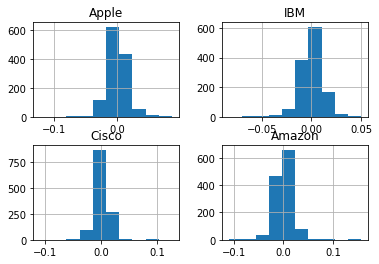

In [22]:
(np.divide(stocks-stocks.shift(1), stocks.shift(1))).hist(bins = 10)

In [23]:
(np.divide(stocks-stocks.shift(1), stocks.shift(1))).corr()

,Apple,IBM,Cisco,Amazon
Apple,1.000000,0.297498,0.301990,0.235487
IBM,0.297498,1.000000,0.424672,0.258492
Cisco,0.301990,0.424672,1.000000,0.284470
Amazon,0.235487,0.258492,0.284470,1.000000


<IPython.core.display.Javascript object>

<AxesSubplot:>

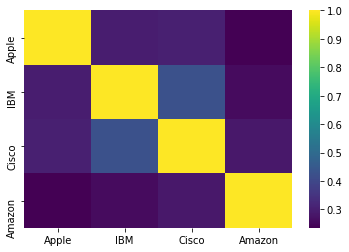

In [27]:
sns.heatmap((np.divide(stocks-stocks.shift(1), stocks.shift(1)).corr()), cmap = 'viridis')

In [28]:
(np.divide(stocks-stocks.shift(1), stocks.shift(1))).cov()

,Apple,IBM,Cisco,Amazon
Apple,0.000270,0.000057,0.000071,0.000075
IBM,0.000057,0.000138,0.000071,0.000059
Cisco,0.000071,0.000071,0.000205,0.000079
Amazon,0.000075,0.000059,0.000079,0.000380


In [29]:
(np.divide(stocks-stocks.shift(1), stocks.shift(1))).var()

Apple     0.000270
IBM       0.000138
Cisco     0.000205
Amazon    0.000380
dtype: float64

In [39]:
weights = np.random.random(4)

In [40]:
norm_wts = weights/weights.sum()

In [42]:
norm_wts

array([0.12686217, 0.30245633, 0.52661101, 0.04407049])

In [60]:
expected_return_val = np.sum(1000000*((np.divide(stocks-stocks.shift(1), stocks.shift(1))).mean()*norm_wts))

In [61]:
exp_ret = np.sum(((np.divide(stocks-stocks.shift(1), stocks.shift(1))).mean()*norm_wts)) 

In [62]:
exp_ret

0.0004936080943433022

In [68]:
exp_vol = np.sum(norm_wts*(np.divide(stocks-stocks.shift(1), stocks.shift(1))).std())

In [69]:
sharpe_ratio =  exp_ret/exp_vol

In [70]:
annual_sharpe = sharpe_ratio*252**0.5

In [71]:
annual_sharpe


0.5584750501828339

## Monte Carlo Simulation for Sharpe Ratio

In [81]:
sharpe = [None]*5000
wts = [None]*5000
for i in range(5000):
    weights = np.random.random(4)
    norm_wts = weights/weights.sum()
    exp_ret = np.sum(((np.divide(stocks-stocks.shift(1), stocks.shift(1))).mean()*norm_wts)) 
    exp_vol = np.sum(norm_wts*(np.divide(stocks-stocks.shift(1), stocks.shift(1))).std())
    sharpe_ratio =  exp_ret/exp_vol
    annual_sharpe = sharpe_ratio*252**0.5
    sharpe[i] = annual_sharpe
    wts[i] = norm_wts

In [82]:
np.mean(sharpe)

0.7016324875345121

In [83]:
max(sharpe)

1.0386000495613241

In [84]:
min(sharpe)

0.2376458608517879

In [88]:
np.argmax(sharpe)

2970

In [89]:
wts[np.argmax(sharpe)]

array([0.05590345, 0.01944466, 0.0438691 , 0.88078278])

In [90]:
stocks.columns

Index(['Apple', 'IBM', 'Cisco', 'Amazon'], dtype='object')

<AxesSubplot:xlabel='Date'>

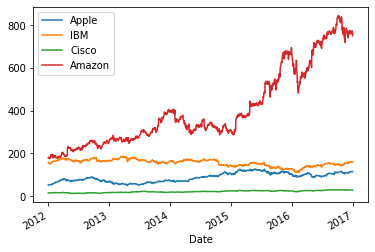

In [91]:
stocks.plot()